# 1. Import and Install Dependencies

In [ ]:
# !pip3 install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [3]:
import tensorflow

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
draw_landmarks(frame, results)

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
len(results.left_hand_landmarks.landmark)

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
#     if results.face_landmarks 
#     else np.zeros(1404)


In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
for res in result_test:
    print(res)

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

# 4. Setup Folders for Collection

In [10]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [ ]:
# for action in actions: 
#     # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(start_folder, start_folder+no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [14]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

In [ ]:
np.array(labels).shape

In [15]:
X = np.array(sequences)

In [ ]:
X.shape

In [16]:
y = to_categorical(labels).astype(int)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
y_test.shape

In [46]:
!pip install pandas
import pandas as pd

# Flatten the X_test data for CSV storage (samples, features)
num_samples = X_test.shape[0]
num_timesteps = X_test.shape[1]
num_features = X_test.shape[2]
X_test_flat = X_test.reshape(num_samples, num_timesteps * num_features)

# Convert one-hot encoded y_test back to single labels
y_test_labels = np.argmax(y_test, axis=1)

# Create a Pandas DataFrame
# Column names can be simplified for CSV
df_X = pd.DataFrame(X_test_flat)
df_y = pd.DataFrame(y_test_labels, columns=['label'])

# Combine features and labels
df_test = pd.concat([df_X, df_y], axis=1)

# Define the path for the CSV file within MP_Data
csv_file_path = os.path.join(os.path.join('./') , 'holistic_test_data.csv')

# Save the DataFrame to CSV
df_test.to_csv(csv_file_path, index=False)

print(f"Test data saved to {csv_file_path}")
print(f"CSV shape: {df_test.shape}") # Should be (num_samples, flattened_features + 1)


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Test data saved to ./holistic_test_data.csv
CSV shape: (5, 49861)


# 7. Build and Train LSTM Neural Network

In [18]:
import tensorflow
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
# tb_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir)

In [19]:
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(tensorflow.keras.layers.LSTM(128, return_sequences=True, activation='relu'))
model.add(tensorflow.keras.layers.LSTM(64, return_sequences=False, activation='relu'))
model.add(tensorflow.keras.layers.Dense(64, activation='relu'))
model.add(tensorflow.keras.layers.Dense(32, activation='relu'))
model.add(tensorflow.keras.layers.Dense(actions.shape[0], activation='softmax'))

In [ ]:
actions.shape[0]

In [20]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), verbose=1) # callbacks=[tb_callback]

Epoch 1/1000
2/2 [==============================] - 1s 194ms/step - loss: 1.1063 - categorical_accuracy: 0.3059 - val_loss: 0.8979 - val_categorical_accuracy: 0.6000
Epoch 2/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.1510 - categorical_accuracy: 0.3412 - val_loss: 1.0753 - val_categorical_accuracy: 0.6000
Epoch 3/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.0984 - categorical_accuracy: 0.3176 - val_loss: 1.0932 - val_categorical_accuracy: 0.2000
Epoch 4/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.0938 - categorical_accuracy: 0.4235 - val_loss: 1.0361 - val_categorical_accuracy: 0.6000
Epoch 5/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.0873 - categorical_accuracy: 0.3176 - val_loss: 1.0173 - val_categorical_accuracy: 0.6000
Epoch 6/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.0701 - categorical_accuracy: 0.3294 - val_loss: 0.9492 - val_categorical_accuracy: 0.6000
Epoch 7/1

KeyboardInterrupt: 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

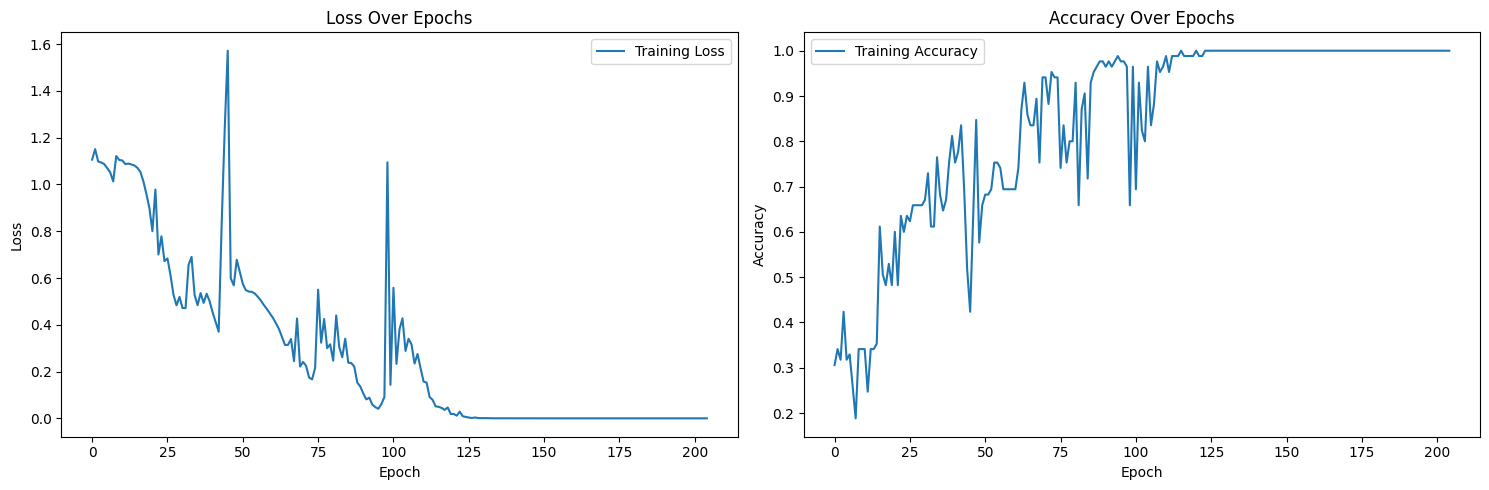

In [22]:
model.summary()

#plot the loss and accuracy curves
import matplotlib.pyplot as plt

# Get training history from the model
history = model.history.history

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax1.plot(history['loss'], label='Training Loss')
ax1.set_title('Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history['categorical_accuracy'], label='Training Accuracy')
ax2.set_title('Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

# 8. Make Predictions

In [23]:
res = model.predict(X_test)

1/1 [==============================] - 0s 142ms/step


In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

# 9. Save Weights

In [ ]:
# del model

In [ ]:
model.load_weights('holistic.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [24]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [25]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 16ms/step


In [26]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [27]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]])

In [28]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [29]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
from keras.models import load_model

loadedModel = load_model('holistic.h5')

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        print(keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
import pickle

filename = "./holistic.pkl"
pickle.dump(model, open(filename, 'wb'))
# model.save("holistic.h5")

In [30]:
import coremltools as ct
from coremltools.models.neural_network import quantization_utils


model.save('holistic_savedmodel')

# Then convert the SavedModel directory
mlmodel = ct.convert(
    'holistic_savedmodel', 
    convert_to="neuralnetwork",
    inputs=[ct.TensorType(shape=(1, 30, 1662))]
)
quantized_model = quantization_utils.quantize_weights(mlmodel, 8)

quantized_model.save('holistic.mlmodel')

Converting TF Frontend ==> MIL Ops: 100%|██████████| 14/14 [00:00<00:00, 89649.25 ops/s]
Input ls elem type unknown. Override with <class 'coremltools.converters.mil.mil.types.type_tensor.tensor.<locals>.tensor'>
Converting TF Frontend ==> MIL Ops: 100%|██████████| 14/14 [00:00<00:00, 34725.17 ops/s]
Input ls elem type unknown. Override with <class 'coremltools.converters.mil.mil.types.type_tensor.tensor.<locals>.tensor'>
Converting TF Frontend ==> MIL Ops: 100%|██████████| 44/44 [00:00<00:00, 10466.14 ops/s]
Saving value type of int64 into a builtin type of int32, might lose precision!
Saving value type of int64 into a builtin type of int32, might lose precision!
Converting TF Frontend ==> MIL Ops: 100%|██████████| 14/14 [00:00<00:00, 38580.98 ops/s]
Input ls elem type unknown. Override with <class 'coremltools.converters.mil.mil.types.type_tensor.tensor.<locals>.tensor'>
Converting TF Frontend ==> MIL Ops: 100%|██████████| 14/14 [00:00<00:00, 72853.92 ops/s]
Input ls elem type unknow

Quantizing using linear quantization
Optimizing Neural Network before Quantization:
Finished optimizing network. Quantizing neural network..
Quantizing layer StatefulPartitionedCall/sequential/lstm_2/TensorArrayV2_1 of type loadConstantND
Quantizing layer tf_make_list_0 of type loadConstantND
Quantizing layer range_1d_0 of type loadConstantND
Quantizing layer tf_make_list_0_value_elem_shape of type loadConstantND
Quantizing layer tf_make_list_0_condition of type branch
Optimizing Neural Network before Quantization:
Finished optimizing network. Quantizing neural network..
Optimizing Neural Network before Quantization:
Finished optimizing network. Quantizing neural network..
Quantizing layer StatefulPartitionedCall/sequential/lstm/TensorArrayV2_1 of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential/lstm/time of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential/lstm/zeros of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential

In [36]:

# try different quantization methods from core ml and compare the performance 

quantized_model = quantization_utils.quantize_weights(mlmodel, 16)
quantized_model.save('holistic_16bit.mlmodel')
quantized_model = quantization_utils.quantize_weights(mlmodel, 8)
quantized_model.save('holistic_8bit.mlmodel')
quantized_model = quantization_utils.quantize_weights(mlmodel, 4)
quantized_model.save('holistic_4bit.mlmodel')
quantized_model = quantization_utils.quantize_weights(mlmodel, 2)
quantized_model.save('holistic_2bit.mlmodel')
quantized_model = quantization_utils.quantize_weights(mlmodel, 1)
quantized_model.save('holistic_1bit.mlmodel')

Quantizing using linear quantization
Quantizing layer StatefulPartitionedCall/sequential/lstm_2/TensorArrayV2_1 of type loadConstantND
Quantizing layer tf_make_list_0 of type loadConstantND
Quantizing layer range_1d_0 of type loadConstantND
Quantizing layer tf_make_list_0_value_elem_shape of type loadConstantND
Quantizing layer tf_make_list_0_condition of type branch
Quantizing layer StatefulPartitionedCall/sequential/lstm/TensorArrayV2_1 of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential/lstm/time of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential/lstm/zeros of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential/lstm/zeros_1 of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential/lstm/while_renamed of type loop
Quantizing layer StatefulPartitionedCall/sequential/lstm/while/__inference_sequential_lstm_while_body_14937_frozen_34974/sequential/lstm/while/lstm_cell/MatMul of type batchedMatmul
Quantizin

In [44]:
# let's inspect the last few layers of this model
coreml_model_path = 'holistic.mlmodel'
import coremltools
spec = coremltools.utils.load_spec(coreml_model_path)
builder = coremltools.models.neural_network.NeuralNetworkBuilder(spec=spec)
builder.inspect_layers(last=3)

[Id: 66], Name: StatefulPartitionedCall/sequential/dense_2/Softmax (Type: softmaxND)
          Updatable: False
          Input blobs: ['StatefulPartitionedCall/sequential/dense_2/BiasAdd']
          Output blobs: ['Identity']
[Id: 65], Name: StatefulPartitionedCall/sequential/dense_2/BiasAdd (Type: innerProduct)
          Updatable: False
          Input blobs: ['StatefulPartitionedCall/sequential/dense_1/Relu']
          Output blobs: ['StatefulPartitionedCall/sequential/dense_2/BiasAdd']
[Id: 64], Name: StatefulPartitionedCall/sequential/dense_1/Relu (Type: activation)
          Updatable: False
          Input blobs: ['StatefulPartitionedCall/sequential/dense_1/BiasAdd']
          Output blobs: ['StatefulPartitionedCall/sequential/dense_1/Relu']


In [45]:
# let's inspect the input of the model as we need this information later on the make_updatable method
builder.inspect_input_features()

neuralnetwork_spec = builder.spec

[Id: 0] Name: lstm_input
          Type: multiArrayType {
  shape: 1
  shape: 30
  shape: 1662
  dataType: FLOAT32
}

